[Reference: DataCamp Project: Mobile Games A/B Testing with Cookie Cats](https://projects.datacamp.com/projects/184)

### 1. Getting Started

In [1]:
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [2]:
data=pd.read_csv('./data/cookie_cats.csv')
data.shape

(90189, 5)

In [3]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### 2. AB Test Data

In [4]:
## Count the number of players in each AB group
data.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

### 3. Distribution

In [5]:
## Count the number of players for number of game rounds played
data_plot = data.groupby('sum_gamerounds')['userid'].count()

## View
data_plot.sample(5)

sum_gamerounds
271    21
185    42
174    62
701     2
326    14
Name: userid, dtype: int64

In [6]:
## Example
data[data['sum_gamerounds']==608]

,userid,version,sum_gamerounds,retention_1,retention_7
8752,961892,gate_30,608,True,True
48805,5409496,gate_40,608,True,True


In [7]:
## Players that played between 0 & 5 games
data_plot.head(5)

sum_gamerounds
0    3994
1    5538
2    4606
3    3958
4    3629
Name: userid, dtype: int64

Text(0.5, 1.0, 'Distribution')

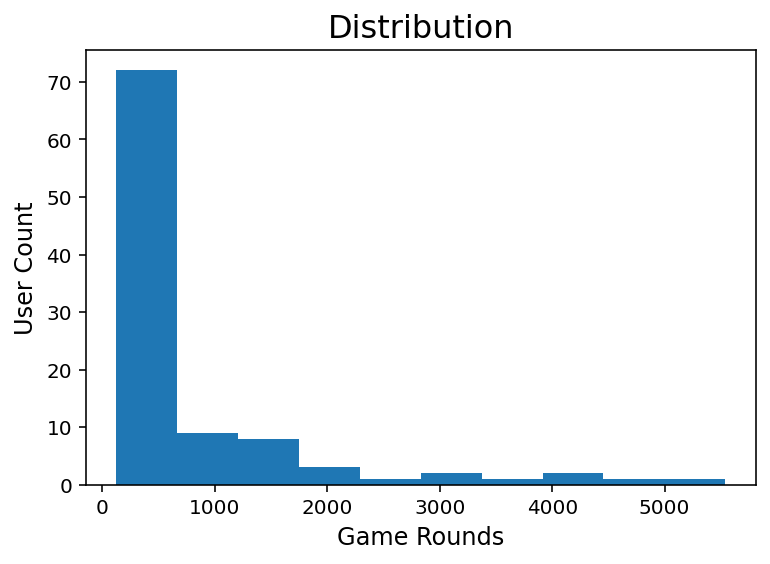

In [8]:
## Plot the distribution of players that played between 0 & 100 games
ax = data_plot.head(100).plot(x='sum_gamerounds', y='userid', kind='hist')
ax.set_xlabel('Game Rounds', size=12)
ax.set_ylabel('User Count', size=12)
ax.set_title('Distribution', size=16)

### 4. Overall 1-Day Retention

- did the player come back and play 1 day after installing?

In [9]:
data.head(3)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False


In [10]:
## Total number of values for column
data['retention_1'].count()

90189

In [11]:
## Counts all True values (True = 1, False = 0)
data['retention_1'].sum()

40153

In [12]:
## Percentage of users that came back the day after they installed
round(data['retention_1'].sum() / data['retention_1'].count(), 3)

0.445

In [13]:
## Mean will return the same (sums the values & divides by the total number of values)
data['retention_1'].mean()

0.4452095044850259

### 5. Overall 1-Day Retention by AB Group

In [14]:
## Number of users that came back the day after they installed by group 
data.groupby('version')['retention_1'].sum()

version
gate_30    20034
gate_40    20119
Name: retention_1, dtype: int64

In [15]:
## Number of players per group
data.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

In [16]:
## Calculates 1-day retention for each group
round(data.groupby('version')['retention_1'].sum() / data.groupby('version')['userid'].count(), 3) * 100

version
gate_30    44.8
gate_40    44.2
dtype: float64

### 6. Bootstrap Analysis of 1-Day Retention

In [17]:
## Perform 500 bootstrap replications & append them to boot_1day list
boot_1day = []
for i in range(500):
    boot_mean = data.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1day.append(boot_mean)

In [18]:
## View 1 bootstrap replication
boot_mean

version
gate_30    0.446752
gate_40    0.443607
Name: retention_1, dtype: float64

In [19]:
## Transform boot_1day list to a pandas DataFrame
boot_1day = pd.DataFrame(boot_1day)

## Shape
boot_1day.shape

(500, 2)

In [20]:
## View
boot_1day.head(3)

version,gate_30,gate_40
retention_1,0.452149,0.445077
retention_1,0.443192,0.440721
retention_1,0.449050,0.440525


<AxesSubplot:ylabel='Density'>

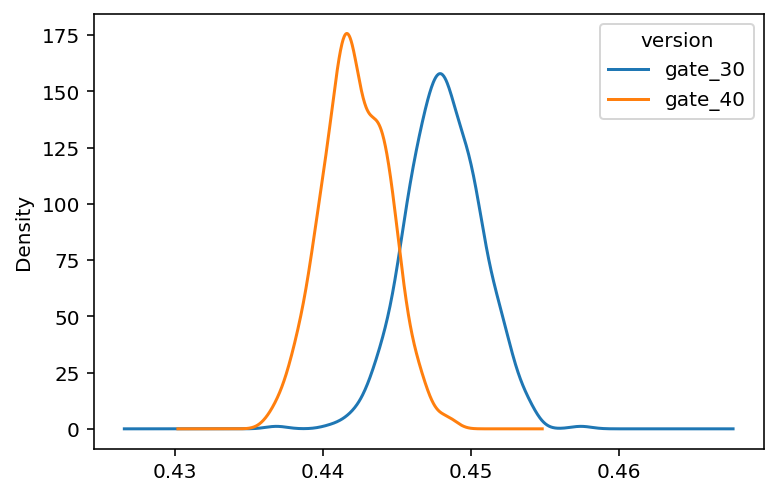

In [21]:
## Plot boot_1d DataFrame as a Kernel Density Estimate plot of the bootstrap distributions
boot_1day.plot(kind='kde')

### 7. Calulating the Difference between Groups

- Calculate the difference between gate_30 & gate_40, divide the difference by gate_40 & multiply by 100 to turn the difference into a percentage

In [22]:
## Example
boot_1day.head(1)

version,gate_30,gate_40
retention_1,0.452149,0.445077


In [23]:
## Step 1 - difference between gate_30 & gate_40
0.449631 - 0.439991

0.009639999999999982

In [24]:
## Step 2 - divide the difference by gate_40
0.009639999999999982 / 0.439991

0.02190953905875343

In [25]:
## Step 3 -  multiply by 100 to turn the difference into a percentage
0.02190953905875343 * 100

2.190953905875343

In [26]:
## Adds a column with the % difference between the two groups
boot_1day['difference_between_groups'] = (boot_1day['gate_30'] - boot_1day['gate_40']) /  boot_1day['gate_40'] * 100

In [27]:
## View
boot_1day.head(3)

version,gate_30,gate_40,difference_between_groups
retention_1,0.452149,0.445077,1.588873
retention_1,0.443192,0.440721,0.560778
retention_1,0.449050,0.440525,1.935333


Text(0.5, 0, '% difference in means')

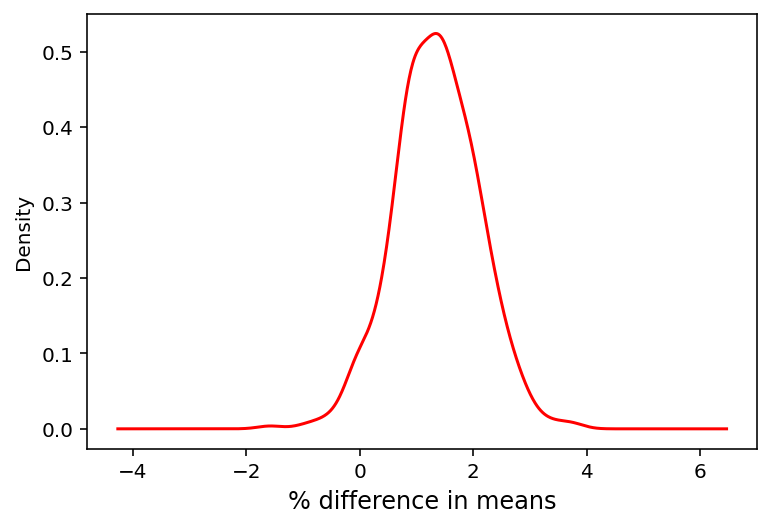

In [28]:
## Plots the Bootstrap & difference between the two groups
ax = boot_1day['difference_between_groups'].plot(kind = 'kde', color='red')
ax.set_xlabel('% difference in means', size=12)

- the most likely % difference is around 1% - 2%

- most of the distribution is above 0%, in favor of a group A (gate 30)

### 8. The Probability of a Difference

- Calculate the probability that a gate at level 30 results in higher 1-day retention

In [29]:
boot_1day.head(3)

version,gate_30,gate_40,difference_between_groups
retention_1,0.452149,0.445077,1.588873
retention_1,0.443192,0.440721,0.560778
retention_1,0.449050,0.440525,1.935333


In [30]:
## Number of values above 0.0 (using sum)
(boot_1day['difference_between_groups'] > 0).sum()

478

In [31]:
## Percantage of values above 0.0 (using means) - Calculates the probability
(boot_1day['difference_between_groups'] > 0).mean()

0.956

In [32]:
## Returns the probability of greater 1-day retention when the gate is level 30
probability = (boot_1day['difference_between_groups'] > 0).sum() / len(boot_1day)
probability

0.956

In [33]:
## Probability percentage
'{:.1%}'.format(probability)

'95.6%'

- bootstrap analysis:

- there is a high probability that 1-day retention is better when the gate is at level 30 

- NOTE that players have only been playing the game for ONE DAY & are very unlikely to have reached level 30, let alone level 40

- thus, player experience is unlikely to have been influenced by either gate

- however players who have recorded more than a weeks worth of playtime are more likely to have reached level 40 & beyond

- it makes much more sense to analsye 7-day retention

### 9. Overall 7-Day Retention by AB group

- did the player come back and play 7 days after installing?

In [34]:
## Number of users that came back the day after they installed by group 
data.groupby('version')['retention_7'].sum()

version
gate_30    8502
gate_40    8279
Name: retention_7, dtype: int64

In [35]:
## Calculates 7-day retention for each group
round(data.groupby('version')['retention_7'].sum() / data.groupby('version')['userid'].count(), 3) * 100

version
gate_30    19.0
gate_40    18.2
dtype: float64

- similar to 1-day retention, 7-day retention is slightly lower (18.2%) when the gate is at level 40 than when the gate is at level 30 (19%)

- this is possibly due to players having more time to reach the first gate at level 30

- it is also worth noting that 7-day retention is much lower than 1-day retention: that is, less people play the game one week after installation

### 10. Bootstrap Analysis of 7-Day Retention

In [ ]:
## Perform 500 bootstrap replications & append them to boot_7day list
boot_7day = []
for i in range(500):
    boot_mean = data.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7day.append(boot_mean)

In [ ]:
## View a bootstrap replication
boot_mean

In [ ]:
## Transform boot_1day list to a pandas DataFrame
boot_7day = pd.DataFrame(boot_7day)

## Shape
boot_7day.shape

In [ ]:
## Adds a column with the % difference between the two groups
boot_7day['difference_between_groups'] = (boot_7day['gate_30'] - boot_7day['gate_40']) /  boot_7day['gate_40'] * 100

In [ ]:
## View
boot_7day.head(3)

In [ ]:
## Plots the Bootstrap & difference between the two groups
ax = boot_7day['difference_between_groups'].plot(kind = 'kde', color='red')
ax.set_xlabel('% difference in means', size=12)

- the most likely % difference is around 1% - 5%

- most of the distribution is above 0%, in favor of a group A (gate 30)

In [ ]:
## Returns the probability of greater 1-day retention when the gate is level 30
probability = (boot_7day['difference_between_groups'] > 0).sum() / len(boot_1day)
probability

In [ ]:
## Probability percentage
'{:.1%}'.format(probability)

- bootstrap analysis:

- clear evidence that 7-day retention is higher when the gate is at level 30

- to keep player retention high, for both 1-day & 7-day rentention, the gate should remain at level 30

- by forcing players to take a break from the game when they reach a gate 30, their enjoyment of the game can be prolonged

- when the gate is at level 40, fewer players make it this far, as they are likely to have quit the game as a result of boredom